# Part 1

## EDA & Data Preprocessing on Google App Store Rating Dataset.

## 1. Import required libraries and read the dataset.


In [59]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [60]:
# Importing dataset

data = pd.read_csv('Apps_data+(1).csv') 

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [61]:
print('First 5 samples\n')
data.head()

First 5 samples



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
print('Shape of the dataset -\n')
data.shape

Shape of the dataset -



(10841, 13)

In [63]:
# to check the information of the dataset
inf = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [64]:
print("Summary statistics of the data ")
data.describe(include = "all")

Summary statistics of the data 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Check if there are any duplicate records in the dataset? if any drop them.

In [65]:
data.duplicated().sum()  # their were 483 duplicate valaues

483

In [66]:
data.drop_duplicates(inplace=True) # Dropping the duplicates

## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [67]:
# Determining the total number of unique category

data.groupby('Category')['Category'].nunique().sum()


34

In [68]:
unique_categories = data['Category'].unique()
print(unique_categories)


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


As we can see there are atotal of 34 unique categories in the column 'category'

All the categories seems to be fine and valid except one category that is '1.9' so this can be considered as an invalid catgory

In [69]:
# Dropping the invalid category 

data = data[data['Category'] != '1.9']


In [70]:
# Checking that the invalid category is dropped sucessfully 

data.groupby('Category')['Category'].nunique() 


Category
ART_AND_DESIGN         1
AUTO_AND_VEHICLES      1
BEAUTY                 1
BOOKS_AND_REFERENCE    1
BUSINESS               1
COMICS                 1
COMMUNICATION          1
DATING                 1
EDUCATION              1
ENTERTAINMENT          1
EVENTS                 1
FAMILY                 1
FINANCE                1
FOOD_AND_DRINK         1
GAME                   1
HEALTH_AND_FITNESS     1
HOUSE_AND_HOME         1
LIBRARIES_AND_DEMO     1
LIFESTYLE              1
MAPS_AND_NAVIGATION    1
MEDICAL                1
NEWS_AND_MAGAZINES     1
PARENTING              1
PERSONALIZATION        1
PHOTOGRAPHY            1
PRODUCTIVITY           1
SHOPPING               1
SOCIAL                 1
SPORTS                 1
TOOLS                  1
TRAVEL_AND_LOCAL       1
VIDEO_PLAYERS          1
WEATHER                1
Name: Category, dtype: int64

## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [71]:
# Checking the rating column for missing values

missing_values = data['Rating'].isnull().sum()
print('Missing values :' , missing_values)

Missing values : 1465


In [72]:
# Dropping the missing values 
data = data.dropna(subset = ['Rating'])

In [73]:
# Creating a new column 
data['Rating_category'] = data['Rating'].apply(lambda x : 'High' if x > 3.5 else 'Low')

In [74]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [75]:
# Checking the distribution of the newly created column "Rating_category"

data['Rating_category'].value_counts()

High    8012
Low      880
Name: Rating_category, dtype: int64

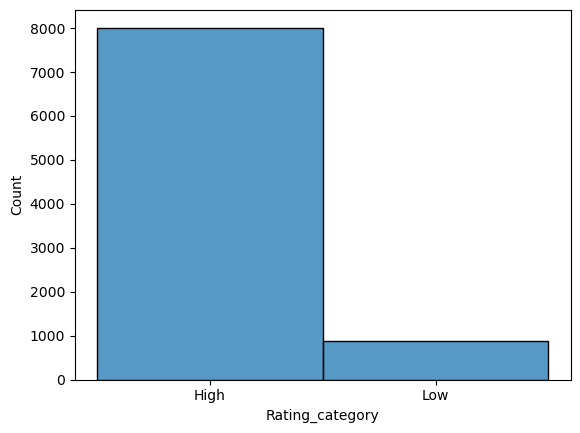

In [76]:
# We can also check the distribution visually 

sns.histplot( x = 'Rating_category' , data = data )
plt.show()

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [77]:
# Converting Reviews column to numeric data type

data["Reviews"] = pd.to_numeric(data["Reviews"],errors='coerce') 

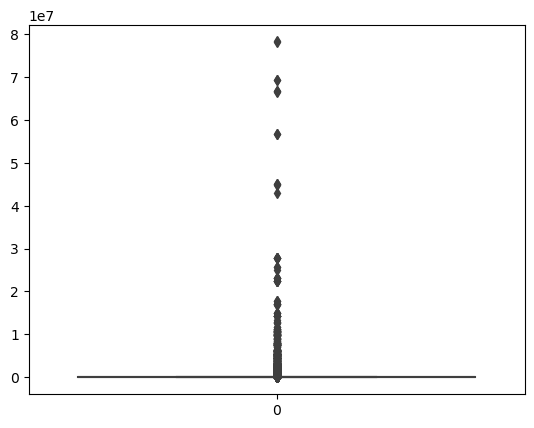

In [78]:
sns.boxplot(data['Reviews'].dropna())
plt.show()

# their are outliers

In [79]:
# handle the outliers using a transformation approach.(Hint: Use log transformation)

data['Reviews_log'] = np.log(data['Reviews'])
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198


## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [22]:
data.head(10) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,High,5.117994
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,High,5.181784
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,High,10.513661
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,High,9.531771
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,High,4.795791


In [80]:
# Checking the size column

data['Size'].unique()  

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [81]:
new_vals = { "M" : '1000000' , "K" : "1000" , "k": "1000"}  # Making a dictionary for new values

In [82]:
data['Size'] = data['Size'].replace(new_vals , regex = True) # Replacing the values

In [83]:
data = data[data['Size'] != 'Varies with device']     # Dropping the entries with size='Varies with device' 

In [84]:
data["Size"] = pd.to_numeric(data["Size"])        # Converting to numeric data
data["Size"].dtype       

dtype('float64')

## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [85]:
# Checking the 'Installs' column 

data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [86]:
# Treating the unwanted characters 

data['Installs'] = data['Installs'].str.replace('+','').str.replace(',','') 
data['Installs'].unique()

C:\Users\NITRO\AppData\Local\Temp\ipykernel_6300\1342669321.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace('+','').str.replace(',','')


array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [87]:
# Converting to suitable dtatype

data['Installs'] = pd.to_numeric(data['Installs'])
data['Installs'].dtype

dtype('int64')

## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [88]:
# Checking the 'Price' column

data['Price'].unique()               

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [89]:
# Removing the unwanted characters 

data['Price'] = data['Price'].str.replace('$','')
data['Price'].unique()

C:\Users\NITRO\AppData\Local\Temp\ipykernel_6300\2934134773.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$','')


array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [90]:
data['Price'] = pd.to_numeric(data['Price'])
data['Price'].dtype

dtype('float64')

## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since wecreated a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [91]:
# Dropping the columns 

data.drop(['App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver'], axis = 1 , inplace = True)

In [92]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159,1.910000e+08,10000,Free,0.0,Everyone,High,5.068904
1,ART_AND_DESIGN,967,1.410000e+08,500000,Free,0.0,Everyone,High,6.874198
2,ART_AND_DESIGN,87510,8.710000e+00,5000000,Free,0.0,Everyone,High,11.379508
3,ART_AND_DESIGN,215644,2.510000e+08,50000000,Free,0.0,Teen,High,12.281384
4,ART_AND_DESIGN,967,2.810000e+00,100000,Free,0.0,Everyone,High,6.874198


## 13. Encode the categorical columns.

In [93]:
le = LabelEncoder()

data['Category'] = le.fit_transform(data['Category'])
data['Type'] = le.fit_transform(data['Type'])
data['Content Rating'] = le.fit_transform(data['Content Rating'])
data['Rating_category'] = le.fit_transform(data['Rating_category'])
data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,0,159,1.910000e+08,10000,0,0.0,1,0,5.068904
1,0,967,1.410000e+08,500000,0,0.0,1,0,6.874198
2,0,87510,8.710000e+00,5000000,0,0.0,1,0,11.379508
3,0,215644,2.510000e+08,50000000,0,0.0,4,0,12.281384
4,0,967,2.810000e+00,100000,0,0.0,1,0,6.874198
...,...,...,...,...,...,...,...,...,...
10833,3,44,6.191000e+06,1000,0,0.0,1,0,3.784190
10834,11,7,2.610000e+00,500,0,0.0,1,0,1.945910
10836,11,38,5.310000e+08,5000,0,0.0,1,0,3.637586
10837,11,4,3.610000e+00,100,0,0.0,1,0,1.386294


## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [94]:
data['Rating_category'] = pd.to_numeric(data['Rating_category'],errors='coerce')

In [104]:
X = data.drop('Rating_category',axis=1)   # Independent variables 

Y = data['Rating_category']               # Target

## 15. Split the dataset into train and test.

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 16. Standardize the data, so that the values are within a particular range.

In [109]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

X_test_scaled 

array([[-0.31803002, -0.02762739,  2.40610948, ..., -0.06359173,
         2.51503078,  1.25487009],
       [-0.31803002, -0.15667028, -0.8394239 , ..., -0.06359173,
        -0.4645758 , -0.87573998],
       [-1.79517833, -0.15667373, -0.83942392, ..., -0.06359173,
        -0.4645758 , -0.89666096],
       ...,
       [ 1.52840536, -0.15203774, -0.83942391, ..., -0.06359173,
        -0.4645758 ,  0.36461433],
       [-0.31803002,  0.76562008,  1.4456557 , ..., -0.06359173,
         2.51503078,  1.78255601],
       [ 1.40530967, -0.15671225,  1.88586368, ..., -0.06359173,
        -0.4645758 , -1.52947199]])